# Lista 5

## Zadanie 1

### KNN

In [82]:
from sklearn import datasets
from sklearn import datasets
import numpy as np
import random
from scipy import stats
import matplotlib.pyplot as plt


class Knn():
    def __init__(self, k):
        self.k = k
        self.test_target = None

    def knn_test(self, test_data, train_data, train_target):
        sq1_sums = np.array([np.sum(test_data ** 2, axis=1)])
        sq2_sums = np.array([np.sum(train_data ** 2, axis=1)])
        mult = np.array(-2 * test_data.dot(np.transpose(train_data)))
        distances = np.array(np.transpose(sq1_sums) + sq2_sums + mult)

        nearest = train_target[distances.argsort()[:, :self.k]]

        self.test_target = np.concatenate(stats.mode(nearest, axis=1)[0])

    def plots(self, train_data, train_target, test_data):
        all_target = np.concatenate((self.test_target, train_target), axis=0)

        labels = np.unique(all_target)

        for label in labels:
            indexes = np.where(train_target == label)

            x = train_data[indexes][:, 0]
            y = train_data[indexes][:, 1]
            
            indexes = np.where(self.test_target == label)

            np.concatenate((x, test_data[indexes][:, 0]))
            np.concatenate((y, test_data[indexes][:, 1]))

            plt.scatter(x, y)

        plt.show()

    def compute_error(self, test_target_real):
        print(np.where(test_target_real != self.test_target)[0].size / test_target_real.size)
        
    def misclasified(self, test_target_real):
        return np.where(test_target_real != self.test_target)[0].size

        

#### import

In [43]:
iris = datasets.load_iris()
digits = datasets.load_digits()

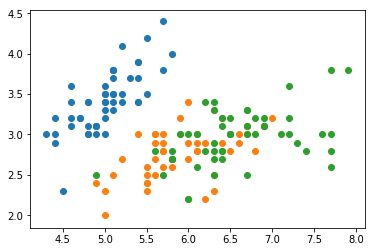

In [44]:
def plots(data, target):
        labels = np.unique(target)

        for label in labels:
            indexes = np.where(target == label)

            x = data[indexes][:, 0]
            y = data[indexes][:, 1]

            plt.scatter(x, y)

        plt.show()
        
plots(iris.data, iris.target)

### K = 3

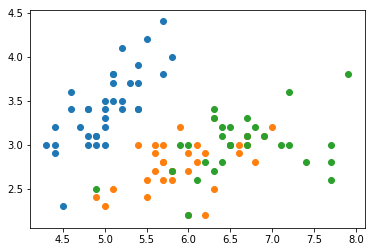

0.02


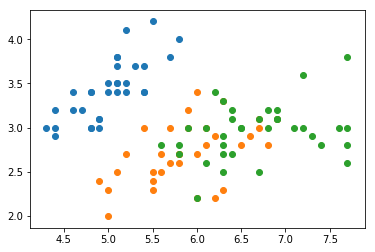

0.04


In [70]:
for i in range(2):
    data_train = random.sample(range(150), 100)
    data_test = [element for element in range(150) if element not in data_train]

    iris_test_data = np.array(iris.data[data_test])
    iris_test_target = np.array(iris.target[data_test])
    iris_train_data = np.array(iris.data[data_train])
    iris_train_target = np.array(iris.target[data_train])

    knn = Knn(3)
    knn.knn_test(iris_test_data, iris_train_data, iris_train_target)
    knn.plots(iris_train_data, iris_train_target, iris_test_data)
    knn.compute_error(np.array(iris.target[data_test]))

### K = 10

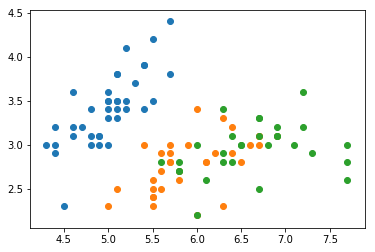

0.08


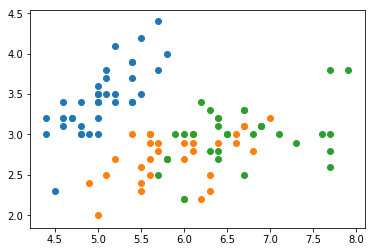

0.04


In [71]:
for i in range(2):
    data_train = random.sample(range(150), 100)
    data_test = [element for element in range(150) if element not in data_train]

    iris_test_data = np.array(iris.data[data_test])
    iris_test_target = np.array(iris.target[data_test])
    iris_train_data = np.array(iris.data[data_train])
    iris_train_target = np.array(iris.target[data_train])

    knn = Knn(10)
    knn.knn_test(iris_test_data, iris_train_data, iris_train_target)
    knn.plots(iris_train_data, iris_train_target, iris_test_data)
    knn.compute_error(np.array(iris.target[data_test]))

### K = 3

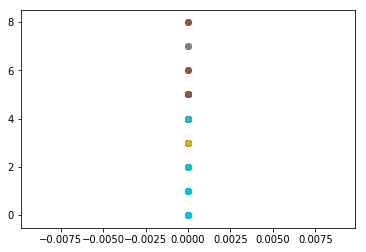

0.010101010101010102


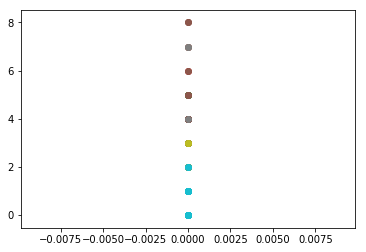

0.006734006734006734


In [72]:
for i in range(2):
    data_train = random.sample(range(1797), 1500)
    data_test = [element for element in range(1797) if element not in data_train]

    digits_test_data = np.array(digits.data[data_test])
    digits_test_target = np.array(digits.target[data_test])
    digits_train_data = np.array(digits.data[data_train])
    digits_train_target = np.array(digits.target[data_train])

    knn = Knn(3)
    knn.knn_test(digits_test_data, digits_train_data, digits_train_target)
    knn.plots(digits_train_data, digits_train_target, digits_test_data)
    knn.compute_error(np.array(digits.target[data_test]))

### K = 10

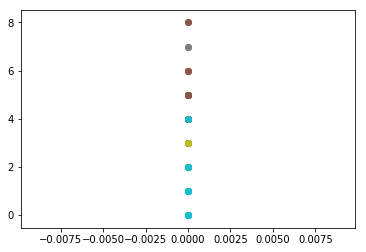

0.016835016835016835


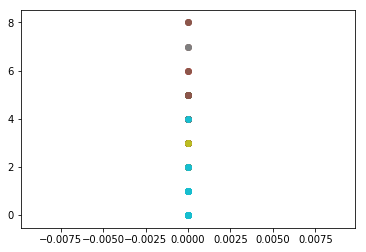

0.026936026936026935


In [73]:
for i in range(2):
    data_train = random.sample(range(1797), 1500)
    data_test = [element for element in range(1797) if element not in data_train]

    digits_test_data = np.array(digits.data[data_test])
    digits_test_target = np.array(digits.target[data_test])
    digits_train_data = np.array(digits.data[data_train])
    digits_train_target = np.array(digits.target[data_train])

    knn = Knn(10)
    knn.knn_test(digits_test_data, digits_train_data, digits_train_target)
    knn.plots(digits_train_data, digits_train_target, digits_test_data)
    knn.compute_error(np.array(digits.target[data_test]))

### cross validation

#### iris

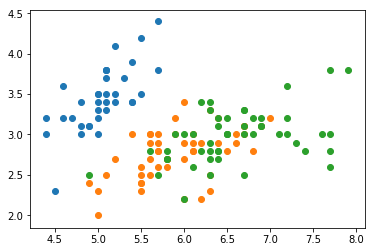

0.0


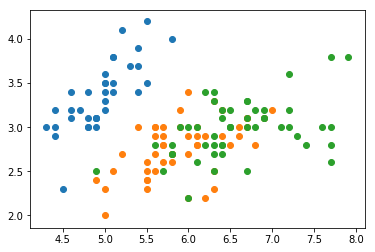

0.0


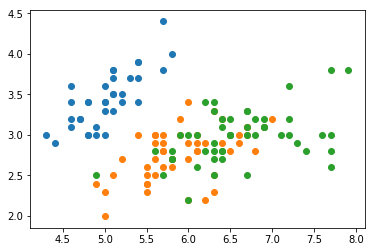

0.0


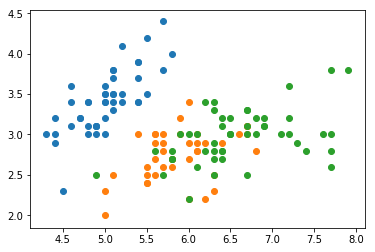

0.0


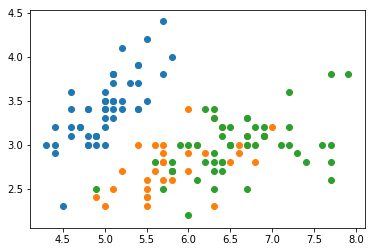

0.13333333333333333


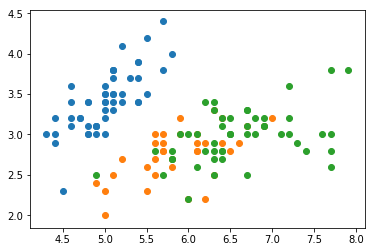

0.13333333333333333


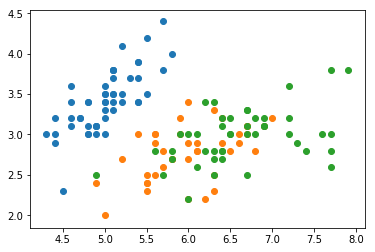

0.0


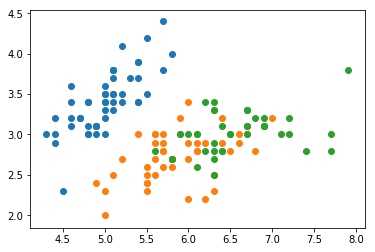

0.06666666666666667


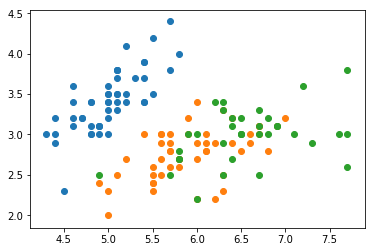

0.26666666666666666


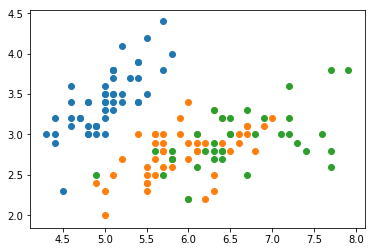

0.06666666666666667
10


In [88]:
error = 0

for i in range(10):
    data_test = list(range(i*15, (i+1)*15))
    data_train = [element for element in range(150) if element not in data_test]

    iris_test_data = np.array(iris.data[data_test])
    iris_test_target = np.array(iris.target[data_test])
    iris_train_data = np.array(iris.data[data_train])
    iris_train_target = np.array(iris.target[data_train])

    knn = Knn(10)
    knn.knn_test(iris_test_data, iris_train_data, iris_train_target)
    knn.plots(iris_train_data, iris_train_target, iris_test_data)
    knn.compute_error(np.array(iris.target[data_test]))
    error += knn.misclasified(np.array(iris.target[data_test]))
    
print(error)

#### digits

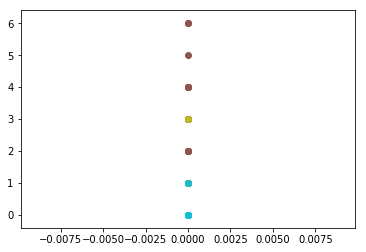

0.13333333333333333


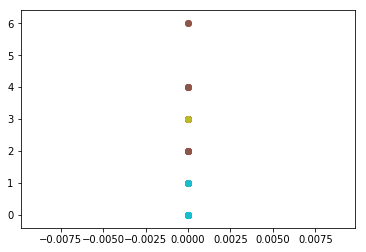

0.0


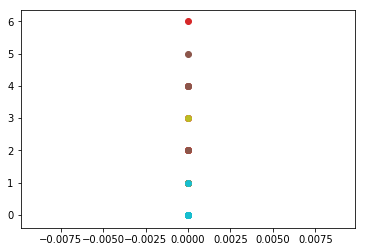

0.0


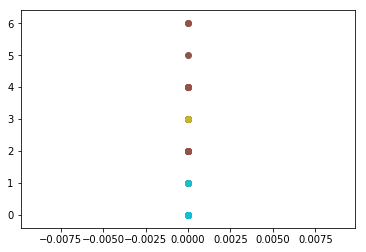

0.0


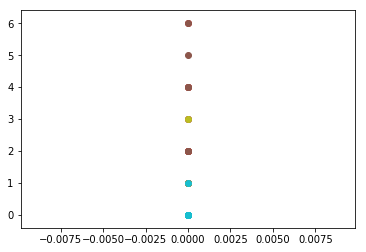

0.06666666666666667


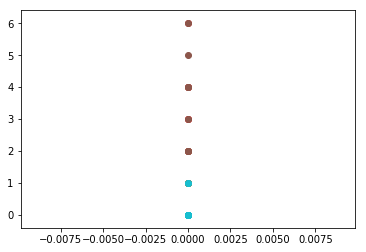

0.0


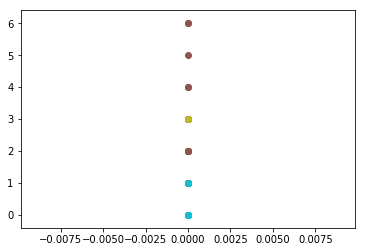

0.06666666666666667


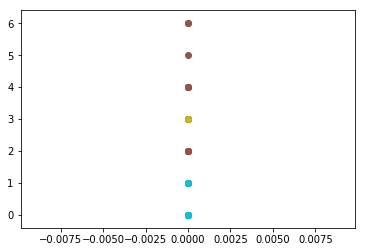

0.0


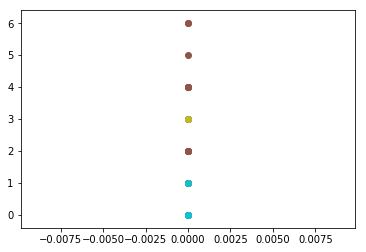

0.13333333333333333


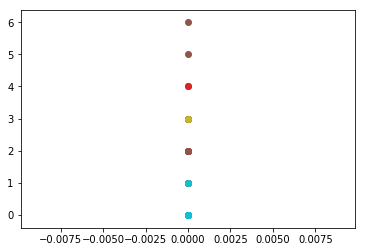

0.0
6


In [89]:
error = 0

for i in range(10):
    data_test = list(range(i*15, (i+1)*15))
    data_train = [element for element in range(150) if element not in data_test]

    digits_test_data = np.array(digits.data[data_test])
    digits_test_target = np.array(digits.target[data_test])
    digits_train_data = np.array(digits.data[data_train])
    digits_train_target = np.array(digits.target[data_train])

    knn = Knn(10)
    knn.knn_test(digits_test_data, digits_train_data, digits_train_target)
    knn.plots(digits_train_data, digits_train_target, digits_test_data)
    knn.compute_error(np.array(digits.target[data_test]))
    error += knn.misclasified(np.array(digits.target[data_test]))
    
print(error)

## Zadanie 2

### Iris

In [3]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import tree

In [4]:
# wczytanie zestawu danych
from sklearn import datasets
iris = datasets.load_iris()

data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:

# rozbicie zestawu danych na dane opisujące kwiat (X) i etykietę klasy (y)
y = data['species']
X = data.drop('species', axis = 1)

print(type(X))

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

<class 'pandas.core.frame.DataFrame'>


In [209]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:


with open("iris.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

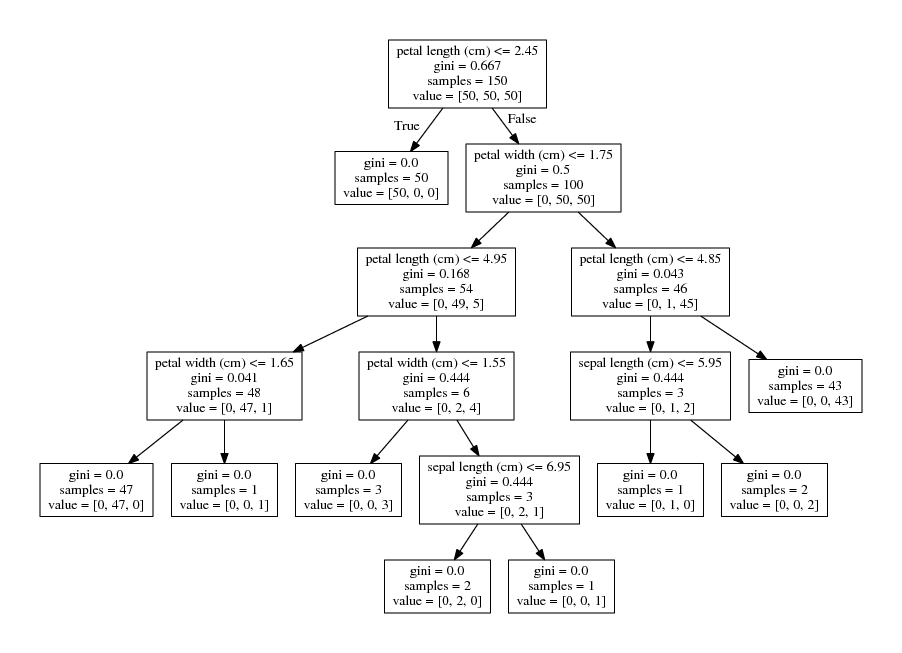

In [210]:
from wand.image import Image as WImage
tree_image = WImage(filename='iris.pdf')
tree_image

In [211]:

# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

1.0

In [212]:
# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier(criterion='entropy')
t = t.fit(X, y)

In [214]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:


with open("iris_entropy.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

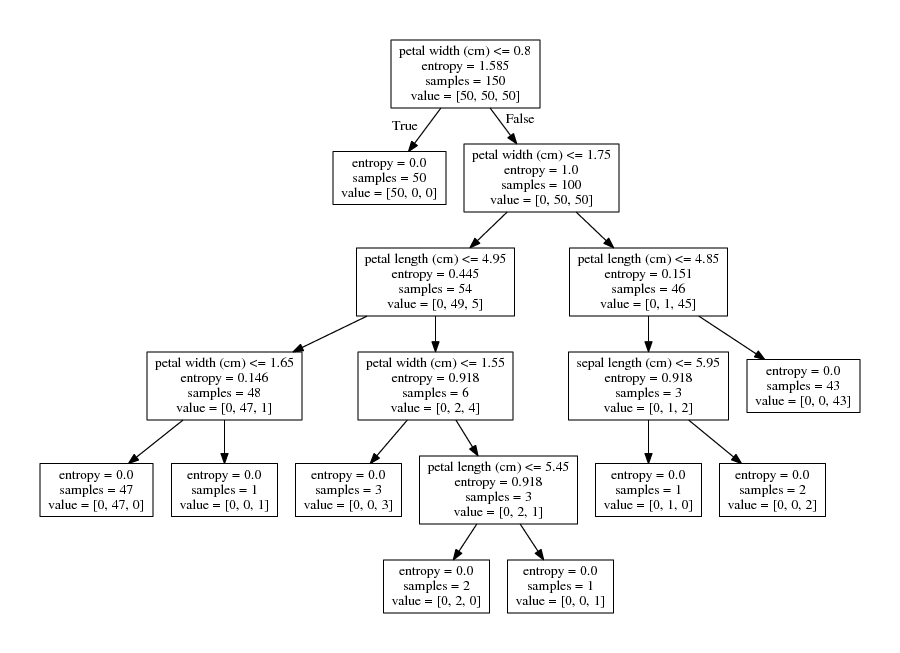

In [215]:
from wand.image import Image as WImage
tree_image = WImage(filename='iris.pdf')
tree_image

In [147]:
# Uczciwiej byłoby oceniać klasyfikator na danych, które nie były używane podczas tworzenia
# klasyfikatora. Dlatego cały zestaw danych warto podzielić na dwie części: dane uczące i dane
# testowe.

data['train'] = np.random.uniform(0, 1, len(data))

data_train = data[data['train'] <= 0.65]
data_test = data[data['train'] > 0.65]

y = data_train['species']
X = data_train.drop('species', axis = 1)

t = tree.DecisionTreeClassifier()
t = t.fit(X, y)

print(t.score(X, y))

y = data_test['species']
X = data_test.drop('species', axis = 1)

print(t.score(X, y))

1.0
0.911111111111


### Titanic

In [383]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [384]:
# usunięcie z zestawu danych atrybutów nieistotnych dla klasyfikacji
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis = 1)
data = data.dropna()
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [385]:
# zmiana kodowania atrybutów nominalnych w zestawie danych
data['Sex'] = pd.Categorical.from_array(data['Sex']).codes
data['Embarked'] = pd.Categorical.from_array(data['Embarked']).codes
data.head()

/home/pozdrowiony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  
/home/pozdrowiony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  This is separate from the ipykernel package so we can avoid doing imports until


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [386]:
# rozbicie zestawu danych na dane opisujące pasażera (X) i etykietę klasy (y)
y = data['Survived']
X = data.drop('Survived', axis = 1)

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X, y)


In [158]:
# zapisanie drzewa klasyfikacyjnego do pliku .dot
# plik ten można przekształcić do pliku .pdf za pomocą programu graphviz używając polecenia:
#   dot -Tpdf titanic.dot -o titanic.pdf

with open("titanic.dot", "w") as f:
    tree.export_graphviz(t, out_file=f, feature_names=X.columns)

In [387]:
# ocena stworzonego klasyfikatora na danych uczących
t.score(X, y)

0.9859550561797753

#### Dane uczące i dane testowe

In [412]:
y_train = y[:600]
X_train = X[:600]

y_test = y[600:712]
X_test = X[600:712]

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier()
t = t.fit(X_train, y_train)

print(t.score(X_train, y_train))
print(t.score(X_test, y_test))

0.983333333333
0.803571428571


#### cross validation

In [394]:
from sklearn.model_selection import cross_val_score

In [398]:
clf = tree.DecisionTreeClassifier()
cross_val_score(clf, X, y, cv=10)

array([ 0.68055556,  0.70833333,  0.79166667,  0.80555556,  0.77464789,
        0.78873239,  0.8028169 ,  0.70422535,  0.75714286,  0.84285714])

#### Spłycenie drzewa

In [413]:
y_train = y[:600]
X_train = X[:600]

y_test = y[600:712]
X_test = X[600:712]

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier(max_depth=10)
t = t.fit(X_train, y_train)

print(t.score(X_train, y_train))
print(t.score(X_test, y_test))

0.94
0.857142857143


In [414]:
y_train = y[:600]
X_train = X[:600]

y_test = y[600:712]
X_test = X[600:712]

# stworzenie drzewa klasyfikacyjnego
t = tree.DecisionTreeClassifier(max_depth=5)
t = t.fit(X_train, y_train)

print(t.score(X_train, y_train))
print(t.score(X_test, y_test))

0.856666666667
0.830357142857


#### cross validation na spłyconym drzewie

In [415]:
clf = tree.DecisionTreeClassifier(max_depth=10)
cross_val_score(clf, X, y, cv=10)

array([ 0.69444444,  0.77777778,  0.76388889,  0.83333333,  0.78873239,
        0.8028169 ,  0.83098592,  0.70422535,  0.82857143,  0.8       ])

In [416]:
clf = tree.DecisionTreeClassifier(max_depth=5)
cross_val_score(clf, X, y, cv=10)

array([ 0.70833333,  0.75      ,  0.75      ,  0.86111111,  0.77464789,
        0.78873239,  0.8028169 ,  0.77464789,  0.85714286,  0.82857143])

## Zadanie 3

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Random Forest

In [132]:
class RandomForest():
    def __init__(self, train_data, train_target, test_data):
        self.train_data = train_data
        self.train_target = train_target
        self.test_data = test_data
        self.test_target = []
    
    def make_model(self):
        clf = RandomForestClassifier(n_estimators=10)
        clf = clf.fit(self.train_data, self.train_target)
        test_target_list = []
        
        for vector in self.test_data:
           test_target_list.append(clf.predict([vector]))
           self.test_target = np.concatenate((test_target_list))
        
    def plots(self):
        all_target = np.concatenate((self.test_target, self.train_target), axis=0)

        labels = np.unique(all_target)

        for label in labels:
            indexes = np.where(self.train_target == label)

            x = self.train_data[indexes][:, 0]
            y = self.train_data[indexes][:, 1]
            
            indexes = np.where(self.test_target == label)

            np.concatenate((x, self.test_data[indexes][:, 0]))
            np.concatenate((y, self.test_data[indexes][:, 1]))

            plt.scatter(x, y)

        plt.show()

    def compute_error(self, test_target_real):
        print(np.where(test_target_real != self.test_target)[0].size / test_target_real.size)
        
    def misclasified(self, test_target_real):
        return np.where(test_target_real != self.test_target)[0].size



#### Iris

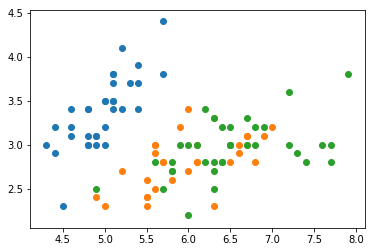

0.02


1

In [133]:
data_train = random.sample(range(150), 100)
data_test = [element for element in range(150) if element not in data_train]

iris_test_data = np.array(iris.data[data_test])
iris_test_target = np.array(iris.target[data_test])
iris_train_data = np.array(iris.data[data_train])
iris_train_target = np.array(iris.target[data_train])

rf = RandomForest(iris_train_data, iris_train_target, iris_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(iris.target[data_test]))
rf.misclasified(np.array(iris.target[data_test]))

#### Titanic

In [ ]:
y = data['Survived']
X = data.drop('Survived', axis = 1)

In [245]:
X.shape

(712, 7)

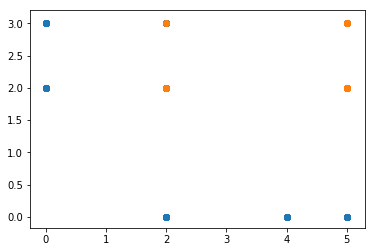

0.0


0

In [320]:
titanic_test_data = np.array(X[600:712])
titanic_test_target = np.array(y[600:712])
titanic_train_data = np.array(X[:600])
titanic_train_target = np.array(y[:600])

rf = RandomForest(titanic_train_data, titanic_train_target, titanic_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[600:712]))
rf.misclasified(np.array(y[600:712]))

### Extremely Randomized Trees

#### iris

In [135]:
class ExtraTrees():
    def __init__(self, train_data, train_target, test_data):
        self.train_data = train_data
        self.train_target = train_target
        self.test_data = test_data
        self.test_target = []
    
    def make_model(self):
        clf = ExtraTreesClassifier(n_estimators=10)
        clf = clf.fit(self.train_data, self.train_target)
        test_target_list = []
        
        for vector in self.test_data:
           test_target_list.append(clf.predict([vector]))
           self.test_target = np.concatenate((test_target_list))
        
    def plots(self):
        all_target = np.concatenate((self.test_target, self.train_target), axis=0)

        labels = np.unique(all_target)

        for label in labels:
            indexes = np.where(self.train_target == label)

            x = self.train_data[indexes][:, 0]
            y = self.train_data[indexes][:, 1]
            
            indexes = np.where(self.test_target == label)

            np.concatenate((x, self.test_data[indexes][:, 0]))
            np.concatenate((y, self.test_data[indexes][:, 1]))

            plt.scatter(x, y)

        plt.show()

    def compute_error(self, test_target_real):
        print(np.where(test_target_real != self.test_target)[0].size / test_target_real.size)
        
    def misclasified(self, test_target_real):
        return np.where(test_target_real != self.test_target)[0].size


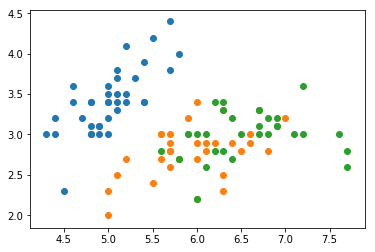

0.04


2

In [137]:
data_train = random.sample(range(150), 100)
data_test = [element for element in range(150) if element not in data_train]

iris_test_data = np.array(iris.data[data_test])
iris_test_target = np.array(iris.target[data_test])
iris_train_data = np.array(iris.data[data_train])
iris_train_target = np.array(iris.target[data_train])

rf = ExtraTrees(iris_train_data, iris_train_target, iris_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(iris.target[data_test]))
rf.misclasified(np.array(iris.target[data_test]))

#### titanic

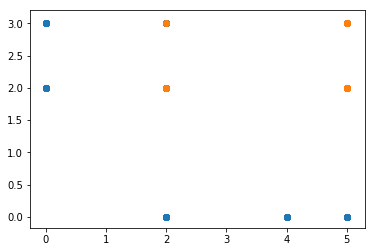

0.0


0

In [319]:
titanic_test_data = np.array(X[600:712])
titanic_test_target = np.array(y[600:712])
titanic_train_data = np.array(X[:600])
titanic_train_target = np.array(y[:600])

rf = ExtraTrees(titanic_train_data, titanic_train_target, titanic_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[600:712]))
rf.misclasified(np.array(y[600:712]))

## Zadanie 4

In [317]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("mushrooms.csv")
data.columns = [str(number) for number in range(23)]
data = data.dropna()
data.head()
for index in range(23):
    data[str(index)] = pd.Categorical.from_array(data[str(index)]).codes
data.head()

/home/pozdrowiony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  import sys


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1


In [334]:
# rozbicie zestawu danych na dane opisujące cechy grzyba (X) i etykietę klasy (y)
y = data['0']
X = data.drop('0', axis = 1)

#### Random Forest

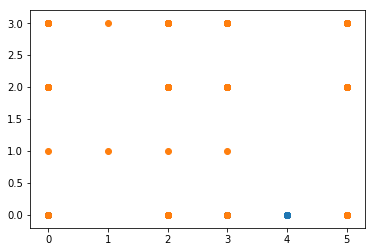

0.0


0

In [321]:
mushrooms_test_data = np.array(X[7000:8122])
mushrooms_test_target = np.array(y[7000:8122])
mushrooms_train_data = np.array(X[:7000])
mushrooms_train_target = np.array(y[:7000])

rf = RandomForest(mushrooms_train_data, mushrooms_train_target, mushrooms_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[7000:8122]))
rf.misclasified(np.array(y[7000:8122]))

#### Extra Randomized Trees

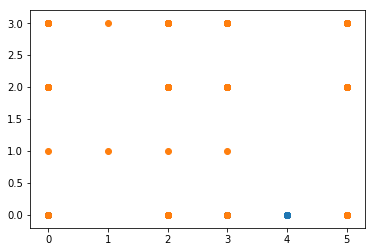

0.0


0

In [322]:
mushrooms_test_data = np.array(X[7000:8122])
mushrooms_test_target = np.array(y[7000:8122])
mushrooms_train_data = np.array(X[:7000])
mushrooms_train_target = np.array(y[:7000])

rf = ExtraTrees(mushrooms_train_data, mushrooms_train_target, mushrooms_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[7000:8122]))
rf.misclasified(np.array(y[7000:8122]))

#### Decision Tree

In [355]:
t = tree.DecisionTreeClassifier()
t = t.fit(X[:7000], y[:7000])

print(t.score(X, y))

t = t.fit(X[7000:8122], y[7000:8122])

print(t.score(X, y))

1.0
0.769666379416


#### Normalizacja Danych

In [372]:
y = data['0']
X = data.drop('0', axis = 1)

maxes = np.max(X, axis=0)
mins = np.min(X, axis=0)
normalized = (X - mins) / (maxes - mins)
normalized = normalized.drop('16', axis=1)

In [374]:
t = tree.DecisionTreeClassifier()
t = t.fit(normalized[:7000], y[:7000])

print(t.score(normalized, y))

y = y[7000:8122]
normalized = normalized[7000:8122]

print(t.score(normalized, y))

1.0
1.0


## Zadanie 5

In [418]:
# wczytanie zestawu danych z pliku
data = pd.read_csv("cars.csv")
data.columns = [str(number) for number in range(7)]
data = data.dropna()
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [419]:
for index in range(7):
    data[str(index)] = pd.Categorical.from_array(data[str(index)]).codes
data.head()

/home/pozdrowiony/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Categorical.from_array is deprecated, use Categorical instead
  


,0,1,2,3,4,5,6
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [422]:
# rozbicie zestawu danych na dane opisujące cechy samochodu (X) i etykietę klasy (y)
y = data['6']
X = data.drop('6', axis = 1)

#### Random Forest

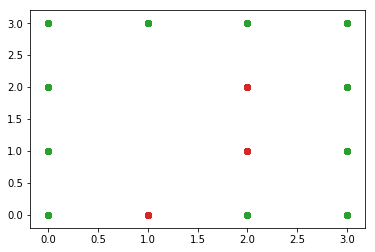

0.2168141592920354


49

In [423]:
cars_test_data = np.array(X[1500:1726])
cars_test_target = np.array(y[1500:1726])
cars_train_data = np.array(X[:1500])
cars_train_target = np.array(y[:1500])

rf = RandomForest(cars_train_data, cars_train_target, cars_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[1500:1726]))
rf.misclasified(np.array(y[1500:1726]))

#### Extra Trees

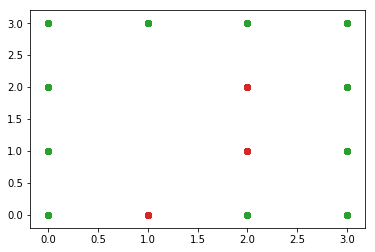

0.252212389380531


57

In [424]:
rf = ExtraTrees(cars_train_data, cars_train_target, cars_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[1500:1726]))
rf.misclasified(np.array(y[1500:1726]))

#### Decision Tree

In [425]:
clf = tree.DecisionTreeClassifier()
cross_val_score(clf, X, y, cv=10)

array([ 0.62643678,  0.79310345,  0.95402299,  0.77011494,  0.9132948 ,
        0.95930233,  0.87209302,  0.88953488,  0.95930233,  0.95294118])

#### Normalizacja Danych

In [429]:
maxes = np.max(X, axis=0)
mins = np.min(X, axis=0)
normalized = (X - mins) / (maxes - mins)

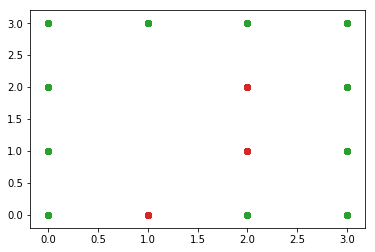

0.26991150442477874


61

In [430]:
cars_test_data = np.array(X[1500:1726])
cars_test_target = np.array(y[1500:1726])
cars_train_data = np.array(X[:1500])
cars_train_target = np.array(y[:1500])

rf = RandomForest(cars_train_data, cars_train_target, cars_test_data)
rf.make_model()
rf.plots()
rf.compute_error(np.array(y[1500:1726]))
rf.misclasified(np.array(y[1500:1726]))

## Zadanie 6

In [ ]:
data = pd.read("")